# Kmaens Clustering 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read The Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CustomerID', 'Gender','Age','Income','Spending']

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

### Classifier Similar Customers based on income and spending

In [7]:
X = df[['Income', 'Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Plot Income and Spend

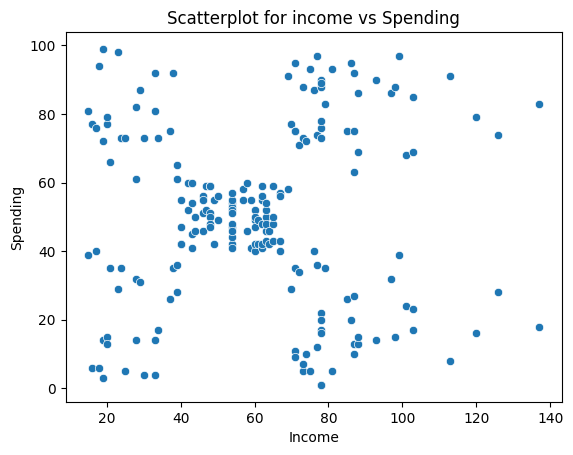

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Income', y='Spending')
plt.title(f'Scatterplot for income vs Spending')
plt.show()

### Create a Preprocessing Pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [12]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [13]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Use elbow method to find best K value

In [14]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and Run all cells

In [15]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

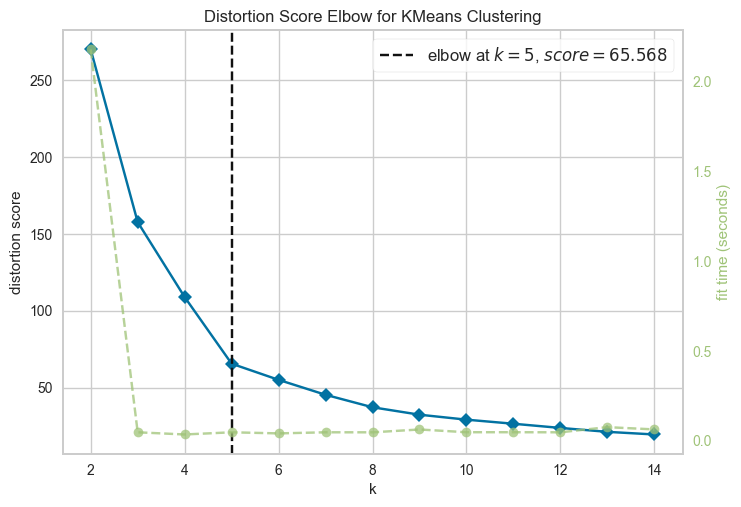

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15))

In [16]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timing=False)

### K-Means algorithm

k=5

In [17]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [18]:
lb= model.labels_
lb

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [19]:
X['Label']=lb

In [20]:
X

,Income,Spending,Label
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3
...,...,...,...
195,120,79,4
196,126,28,0
197,126,74,4
198,137,18,0


### Centroids

In [21]:
C = X.groupby(by='Label').mean()
C

,Income,Spending
Label,,
0,88.200000,17.114286
1,55.296296,49.518519
2,25.727273,79.363636
3,26.304348,20.913043
4,86.538462,82.128205


### Plot clusters

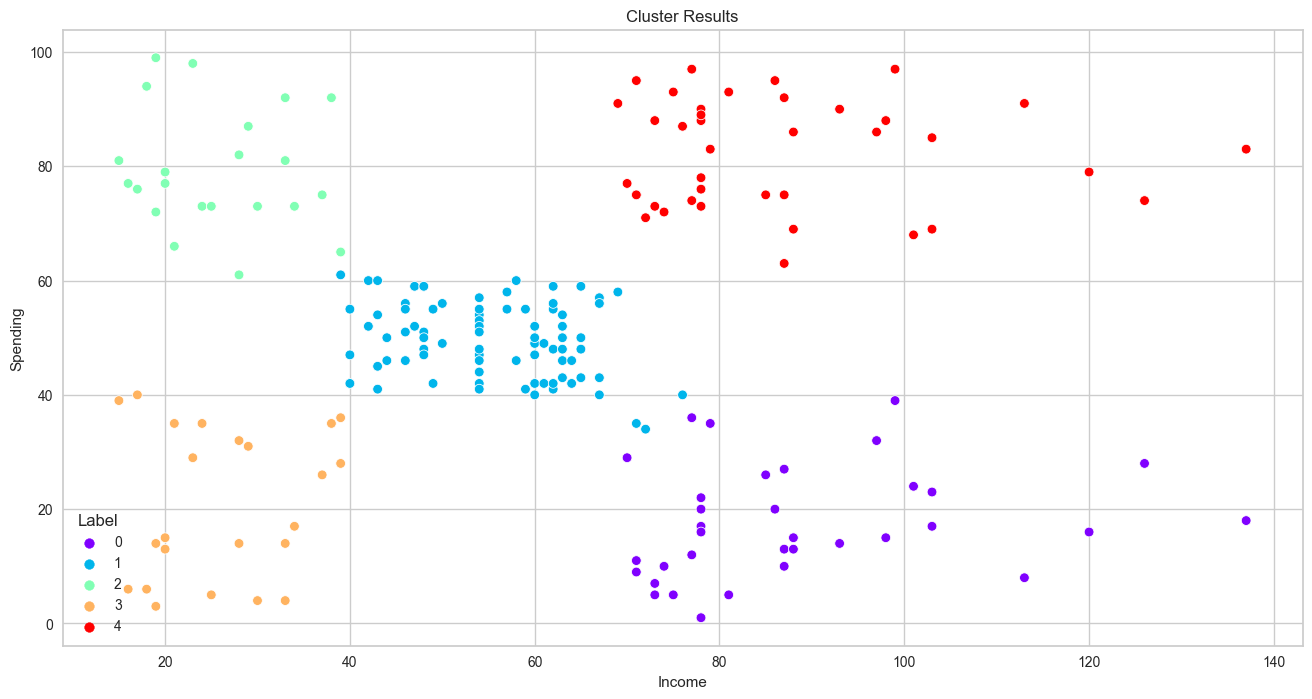

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Label', palette='rainbow')
plt.title('Cluster Results')
plt.show()

In [23]:
X[X['Label']==0]

,Income,Spending,Label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [24]:
X[X['Label']==1]

,Income,Spending,Label
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [25]:
X[X['Label']==2]

,Income,Spending,Label
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2


In [26]:
X[X['Label']==3]

,Income,Spending,Label
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3
10,19,14,3
12,20,15,3
14,20,13,3
16,21,35,3
18,23,29,3


In [27]:
X[X['Label']==4]

,Income,Spending,Label
123,69,91,4
125,70,77,4
127,71,95,4
129,71,75,4
131,71,75,4
133,72,71,4
135,73,88,4
137,73,73,4
139,74,72,4
141,75,93,4


### Cluster the customers based on 3 criteria age, income, gender

In [28]:
X2 = df[['Age', 'Income','Spending']]
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### Preprocessing on X2

In [29]:
num_pipe2= Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [30]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [31]:
cols2 = num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [32]:
X2_pre = pd.DataFrame(X2_pre, columns=cols2)

In [33]:
X2_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### K-elnbow visualizer

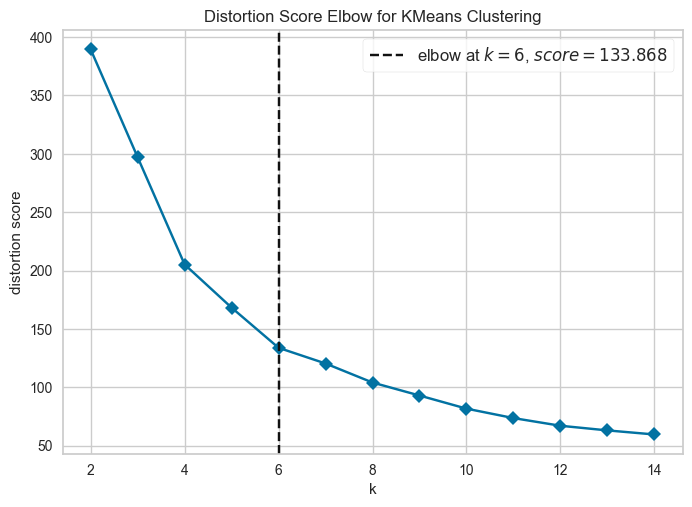

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [34]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2,15),
                  timings=False)

### Create K means Model

In [35]:
model2 =KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [36]:
model2.labels_

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 5,
       4, 1, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 3, 5, 3, 2, 3, 2, 3, 2, 3,
       5, 3, 2, 3, 2, 3, 5, 3, 2, 3, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [37]:
X2['Label']=model2.labels_

In [38]:
X2

,Age,Income,Spending,Label
0,19,15,39,1
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [39]:
for i in range(6):
    print(f'Cluster number:   {i}\n')
    display(X2[X2['Label']==i])
    print('\n============================================================\n')

Cluster number:   0



,Age,Income,Spending,Label
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0




Cluster number:   1



,Age,Income,Spending,Label
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1




Cluster number:   2



,Age,Income,Spending,Label
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2
150,43,78,17,2




Cluster number:   3



,Age,Income,Spending,Label
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




Cluster number:   4



,Age,Income,Spending,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Cluster number:   5



,Age,Income,Spending,Label
43,31,39,61,5
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5


### Create A plotly 

In [40]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and Run All the cell

In [44]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z= 'Spending', color='Label')
fig.add_scatter3d(x=C2['Age'], y=C2['Income'], z=C2['Spending'])
fig.show()

In [42]:
C2 = X2.groupby(by='Label').mean()
C2

,Age,Income,Spending
Label,,,
0,56.333333,54.266667,49.066667
1,25.000000,25.260870,77.608696
2,41.939394,88.939394,16.969697
3,32.692308,86.538462,82.128205
4,45.523810,26.285714,19.380952
5,26.794872,57.102564,48.128205


In [ ]:
import plotly.express as pxfi